<a href="https://colab.research.google.com/github/SpoilStick/ML-Projects/blob/main/ML_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Part 1: Data Exploration
---

In [2]:
# Load dataset
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
data = pd.DataFrame(diabetes.data)
features = diabetes.feature_names
data.columns = features

target = diabetes.target

data['target'] = target

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


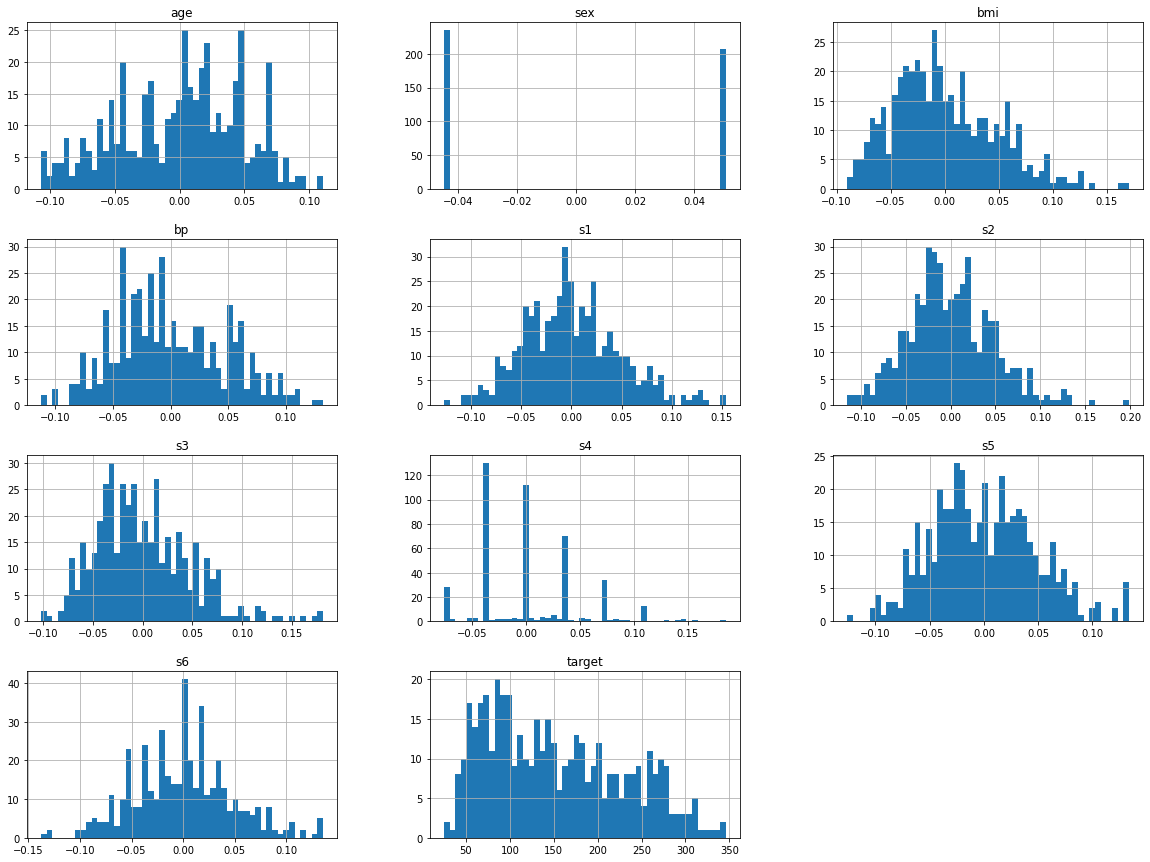

In [7]:
# Plot the data
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Split data into train and test data
train, test =  train_test_split(data, test_size=0.2, random_state=42)
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [9]:
print("Train:", len(train), "Test:", len(test))

Train: 353 Test: 89


In [10]:
# Show how different variables correlate
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

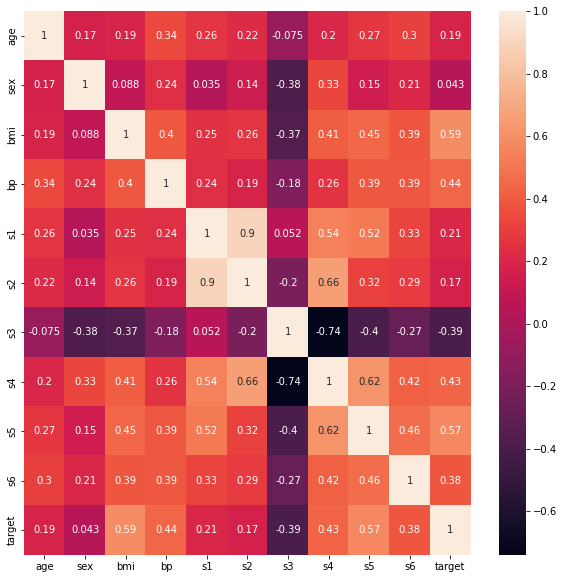

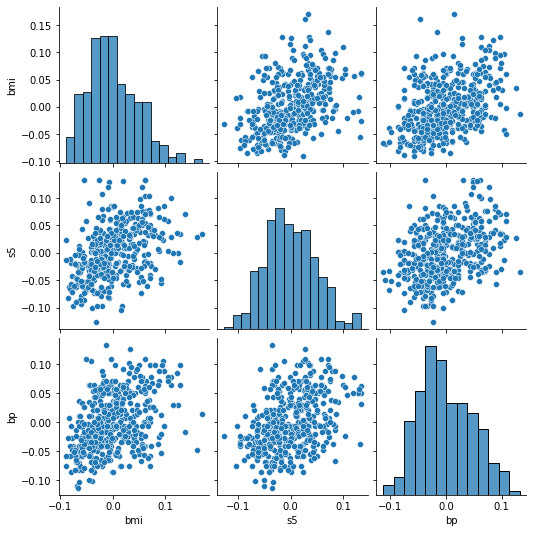

In [11]:
# Another way to plot correlation
plt.figure(figsize=(10,10))
ax= sns.heatmap(corr_matrix, annot=True)
plt.show()

sns.pairplot(data[["bmi","s5","bp"]])

In [12]:
y_train, y_test = train['target'], test['target']
X_train, X_test = train.drop(columns='target'), test.drop(columns='target')

# Part 2: Model Training

---

In [13]:
# Used to evaluate the models
def print_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Std:", scores.std())

**Linear Regression**

In [14]:
# Train linear regression
lin_reg = LinearRegression().fit(X_train ,y_train)
lin_predictions = lin_reg.predict(X_train)

RMSE = mean_squared_error(y_train, lin_predictions, squared=False)
print("RMSE:", RMSE)

# Cross-validation scores
lin_cv_scores = cross_val_score(lin_reg, X_train, y_train)
lin_rmse_scores = np.sqrt(lin_cv_scores)
print_scores(lin_rmse_scores)

RMSE: 53.55881425327268
Scores: [0.73999985 0.60103283 0.71050682 0.78595842 0.46356637]
Mean: 0.6602128592724065
Std: 0.11565423336186727


**Random Forest Regressor**

In [15]:
forest_reg = RandomForestRegressor(random_state=42).fit(X_train ,y_train)
forest_predictions = forest_reg.predict(X_train)

RMSE = mean_squared_error(y_train, forest_predictions, squared=False)
print("RMSE:", RMSE)

forest_cv_scores = cross_val_score(forest_reg, X_train, y_train)
forest_rmse_scores = np.sqrt(forest_cv_scores)
print_scores(forest_rmse_scores)

RMSE: 21.466115310311288
Scores: [0.71508174 0.38589453 0.63978675 0.75375804 0.56040947]
Mean: 0.6109861060456527
Std: 0.13059358248990394


# Part 3: Model Tuning

---



In [16]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [17]:
# Find better parameters
param_grid = [
              {'n_estimators':  [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5).fit(X_train, y_train)

In [18]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [19]:
cvres = grid_search.cv_results_

# Results of the grid search
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.42774210746198427 {'max_features': 2, 'n_estimators': 3}
0.5713222805359849 {'max_features': 2, 'n_estimators': 10}
0.6112838370829137 {'max_features': 2, 'n_estimators': 30}
0.6345136038137259 {'max_features': 2, 'n_estimators': 100}
0.53356426816067 {'max_features': 4, 'n_estimators': 3}
0.6129504741382739 {'max_features': 4, 'n_estimators': 10}
0.6356137595284523 {'max_features': 4, 'n_estimators': 30}
0.6493266296345457 {'max_features': 4, 'n_estimators': 100}
0.49959420633222873 {'max_features': 6, 'n_estimators': 3}
0.5841583328491017 {'max_features': 6, 'n_estimators': 10}
0.6289761329141935 {'max_features': 6, 'n_estimators': 30}
0.6438503966258413 {'max_features': 6, 'n_estimators': 100}
0.48536246340475786 {'max_features': 8, 'n_estimators': 3}
0.5726219864969313 {'max_features': 8, 'n_estimators': 10}
0.6120324142134682 {'max_features': 8, 'n_estimators': 30}
0.6282549220679164 {'max_features': 8, 'n_estimators': 100}
0.49692662746741256 {'bootstrap': False, 'max_features'

In [20]:
pd.DataFrame(cvres)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012652,0.001954,0.003815,0.000213,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.383886,0.116349,0.144090,0.434648,-0.164157,0.182963,0.214549,21
1,0.055056,0.026998,0.008978,0.005043,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.481914,0.184712,0.360343,0.500190,0.104887,0.326409,0.157913,14
2,0.120293,0.040328,0.014359,0.007505,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.504049,0.217633,0.395659,0.529253,0.221746,0.373668,0.133504,10
3,0.453344,0.124676,0.031531,0.015990,2,100,NaN,"{'max_features': 2, 'n_estimators': 100}",0.521785,0.232784,0.424625,0.540044,0.293799,0.402608,0.121865,4
4,0.014789,0.004193,0.003898,0.000324,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.422126,0.005311,0.328530,0.495926,0.171561,0.284691,0.176795,15
5,0.038250,0.015176,0.006515,0.003359,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.542722,0.179086,0.416058,0.511194,0.229481,0.375708,0.146916,8
6,0.067899,0.032683,0.004878,0.000266,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.538470,0.212507,0.464352,0.540994,0.263701,0.404005,0.139173,3
7,0.169657,0.005744,0.011342,0.001484,4,100,NaN,"{'max_features': 4, 'n_estimators': 100}",0.512140,0.248424,0.473812,0.571022,0.302727,0.421625,0.124396,1
8,0.009887,0.003414,0.003079,0.001072,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.364711,-0.005030,0.252628,0.471997,0.163665,0.249594,0.164281,17
9,0.021139,0.000936,0.003316,0.000301,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.443013,0.082865,0.367510,0.525695,0.287121,0.341241,0.151498,12


In [21]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, features), reverse=True)

[(0.28351829440871834, 'bmi'),
 (0.18953648066786374, 's5'),
 (0.11020650778422302, 'bp'),
 (0.08314319479372809, 's6'),
 (0.07572548917242432, 's3'),
 (0.06538523460860281, 's2'),
 (0.061400080248685325, 's4'),
 (0.06136416887821799, 's1'),
 (0.05757954460714262, 'age'),
 (0.01214100483039378, 'sex')]

In [22]:
RMSE = mean_squared_error(y_train, forest_predictions, squared=False)
print("RMSE:", RMSE)

RMSE: 21.466115310311288


How the correlation matrix compares with the grid search from most to least correlation:

**Correlation Matrix:** bmi s5 bp s4 s6 s1 age s2 sex s3

**Feature Importances**: bmi s5 bp s3 s2 s4 s6 s1 age sex

In [23]:
# RMSE of the model found by grid search
best_param_model = grid_search.best_estimator_
best_param_predictions = best_param_model.predict(X_train)

best_param_RMSE = mean_squared_error(y_train, best_param_predictions, squared=False)
print(best_param_RMSE)

21.31335332004428


#**Part 4: Model Evaluation**


*   Assignment 1 Linear Regression RMSE: 59.21
*   Assignment 2 Linear Regression RMSE: 53.56
*   Assignment 2 Random Forest Regressor RMSE: 21.46
*   Assignment 2 RFR with grid search parameters RMSE:  21.31